# Visualize Million Song Dataset

If you have not already done so, make sure to run `cache_msd.ipynb` to cache msd to `msd.pickle` before running this notebook.

## Imports

In [2]:
import dill as pickle
import operator
import time
import matplotlib.pyplot as plt
from matplotlib.axes import Axes as ax

## Utils

In [3]:
def get_array_freq(msd, field='artist_terms'):
    freqs = {}
    for s in msd:
        for t in s[field]:
            if t not in freqs:
                freqs[t] = 0
            freqs[t] = freqs[t] + 1
    return freqs
    
def get_freq(msd, field):
    years = {}
    for s in msd:
        if s[field] not in years:
            years[s[field]] = 0
        years[s[field]] = years[s[field]] + 1
    return years

## Load cached data

In [4]:
start_time = time.time()
with open('../../data/msd.pickle', 'r') as f:
    msd = pickle.load(f)
print('Loaded in {:.2f} seconds'.format(time.time() - start_time))

Loaded in 10.46 seconds


## Plotting

In [4]:
year_freq = get_freq(msd, 'song_year')
key_freq = get_freq(msd,  'song_key')
terms_freq = get_array_freq(msd, 'artist_terms')
mbtags_freq = get_array_freq(msd, 'artist_mbtags')

# above dict items can be sorted into a list of tuples later with
# sorted_terms_freq = sorted(terms_freq.items(), key=operator.itemgetter(1))

In [5]:
sorted_terms_freq = sorted(terms_freq.items(), key=operator.itemgetter(1), reverse=True)[:100]
sorted_mbtags_freq = sorted(mbtags_freq.items(), key=operator.itemgetter(1), reverse=True)[:100]
sorted_key_freq = sorted(key_freq.items(), key=operator.itemgetter(1), reverse=True)
# sorted_year_freq = sorted(year_freq.items(), key=operator.itemgetter(1), reverse=True)

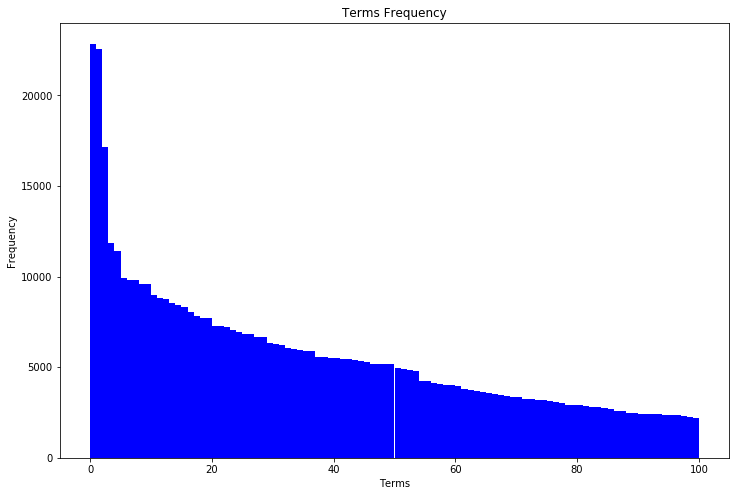

In [6]:
plt.rcParams["figure.figsize"] = (12, 8)

plt.bar(range(0, len(sorted_terms_freq)), 
        [y for x, y in sorted_terms_freq], 
        align='edge', width=1.0, color='blue')
plt.title('Terms Frequency')
plt.ylabel('Frequency')
plt.xlabel('Terms')
plt.show()

In [7]:
for i, v in list(enumerate(sorted_terms_freq))[:50]:
    print('{}. {} {}'.format(str(i + 1).rjust(3), v[0].ljust(20), v[1]))

  1. rock                 22846
  2. pop                  22548
  3. electronic           17167
  4. pop rock             11864
  5. jazz                 11403
  6. alternative rock     9892
  7. ballad               9823
  8. hip hop              9816
  9. soul                 9607
 10. disco                9572
 11. vocal                8980
 12. classic rock         8821
 13. house                8772
 14. alternative          8517
 15. folk                 8445
 16. united states        8343
 17. soundtrack           8059
 18. soft rock            7827
 19. country              7705
 20. electro              7688
 21. synthpop             7295
 22. funk                 7263
 23. techno               7219
 24. blues                7024
 25. germany              6924
 26. downtempo            6852
 27. easy listening       6849
 28. 80s                  6681
 29. indie                6669
 30. acoustic             6313
 31. guitar               6296
 32. classic              6238
 33

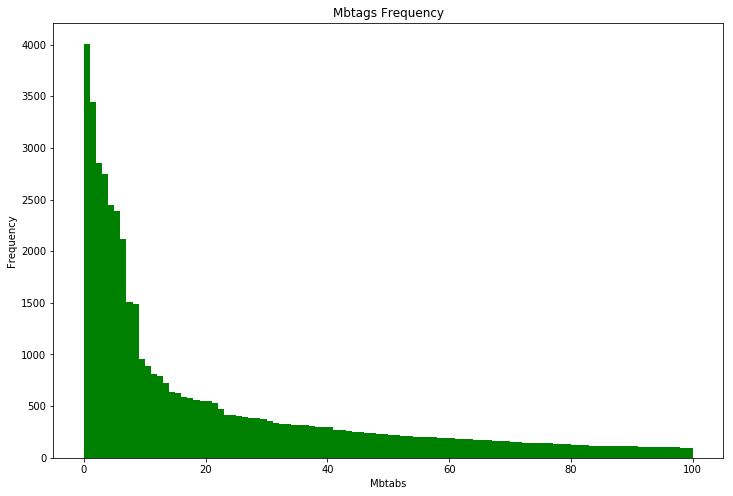

In [8]:
plt.bar(range(0, len(sorted_mbtags_freq)), 
        [y for x, y in sorted_mbtags_freq], 
        align='edge', width=1.0, color='green')
plt.title('Mbtags Frequency')
plt.ylabel('Frequency')
plt.xlabel('Mbtabs')
plt.show()

In [9]:
for i, v in list(enumerate(sorted_mbtags_freq))[:50]:
    print('{}. {} {}'.format(str(i + 1).rjust(3), v[0].ljust(27), v[1]))

  1. classic pop and rock        4009
  2. rock                        3445
  3. american                    2854
  4. british                     2750
  5. uk                          2445
  6. pop                         2392
  7. english                     2116
  8. pop and chart               1509
  9. rock and indie              1486
 10. electronic                  952
 11. alternative rock            889
 12. european                    813
 13. folk                        791
 14. usa                         728
 15. german                      633
 16. hard rock                   631
 17. classical                   593
 18. metal                       578
 19. country                     557
 20. french                      554
 21. américain                  548
 22. pop rock                    529
 23. rnb                         474
 24. hip hop rnb and dance hall  414
 25. new wave                    410
 26. jazz                        402
 27. united states            

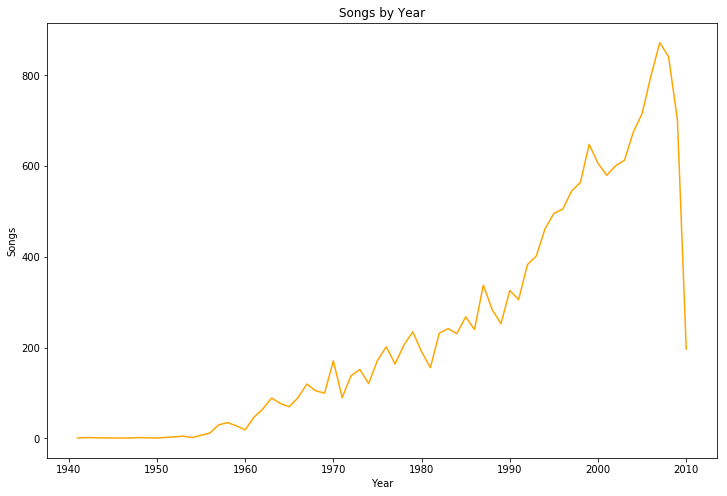

In [10]:
year_freq.pop(0, None)
plt.plot(list(year_freq.keys()), list(year_freq.values()), 
         color='orange')
plt.title('Songs by Year')
plt.ylabel('Songs')
plt.xlabel('Year')
plt.show()

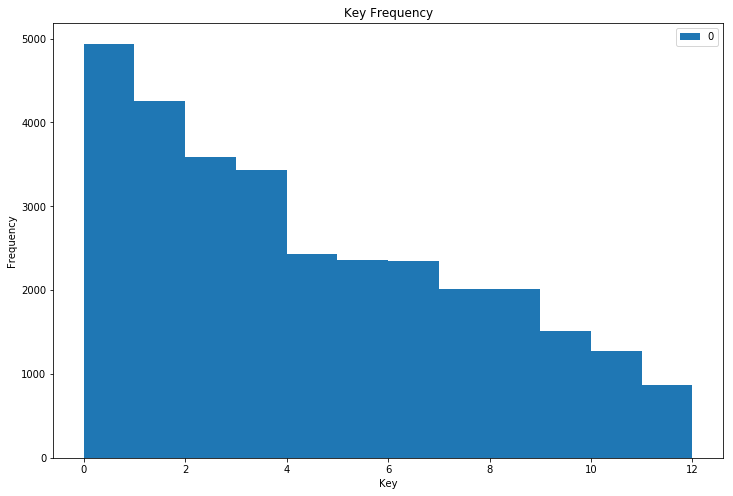

In [11]:
plt.bar(range(0, len(sorted_key_freq)), 
        [y for x, y in sorted_key_freq], 
        align='edge', width=1.0)
plt.title('Key Frequency')
plt.ylabel('Frequency')
plt.xlabel('Key')
plt.legend([x for x, y in sorted_key_freq])
plt.show()